# Grafo das Cidades

Este notebook apresenta um grafo de cidades brasileiras e a implementação de dois algoritmos de busca: BFS (Breadth-First Search) e A* (Busca Informada).

In [ ]:
#10402792, Gabriel Demarqui
#10401556, Guilherme Abilio

In [ ]:

# Importando bibliotecas
import networkx as nx
import matplotlib.pyplot as plt
from queue import PriorityQueue


In [ ]:

# Criando o grafo das cidades
G = nx.Graph()

# Adicionando nós (cidades)
cidades = ["São Paulo", "Rio de Janeiro", "Curitiba", "Belo Horizonte", "Porto Alegre", "Florianópolis",
           "Brasília", "Salvador", "Fortaleza", "Recife", "Goiânia", "Manaus"]
G.add_nodes_from(cidades)

# Adicionando arestas (conexões entre cidades com custos)
arestas = [
    ("São Paulo", "Rio de Janeiro", 430),
    ("São Paulo", "Curitiba", 408),
    ("Curitiba", "Florianópolis", 300),
    ("Florianópolis", "Porto Alegre", 476),
    ("São Paulo", "Belo Horizonte", 586),
    ("Belo Horizonte", "Brasília", 740),
    ("Brasília", "Goiânia", 209),
    ("Brasília", "Salvador", 1440),
    ("Salvador", "Fortaleza", 1020),
    ("Salvador", "Recife", 800),
    ("Recife", "Fortaleza", 800),
    ("Manaus", "Brasília", 1930)
]

G.add_weighted_edges_from(arestas)


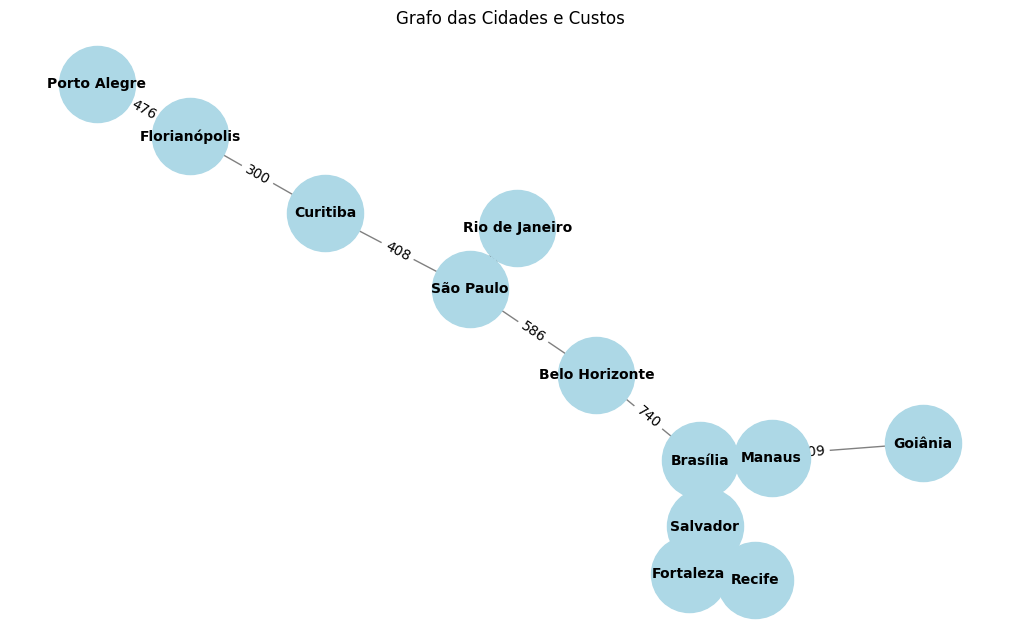

In [ ]:

# Plotando o grafo
plt.figure(figsize=(10,6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Grafo das Cidades e Custos")
plt.show()


## 2. BFS (Breadth-First Search)

O algoritmo BFS explora todos os nós em um nível antes de avançar para o próximo.

In [ ]:

# Implementação do BFS
def bfs(grafo, inicio, objetivo):
    visitados = set()
    fila = [[inicio]]

    while fila:
        caminho = fila.pop(0)
        cidade_atual = caminho[-1]

        if cidade_atual == objetivo:
            return caminho

        if cidade_atual not in visitados:
            visitados.add(cidade_atual)
            for vizinho in grafo[cidade_atual]:
                novo_caminho = list(caminho)
                novo_caminho.append(vizinho)
                fila.append(novo_caminho)

    return None


In [ ]:

# Teste BFS
resultado_bfs = bfs(G, "São Paulo", "Fortaleza")
print("Caminho encontrado pelo BFS:", resultado_bfs)


Caminho encontrado pelo BFS: ['São Paulo', 'Belo Horizonte', 'Brasília', 'Salvador', 'Fortaleza']


## 3. Busca Informada (A*)

O algoritmo de busca informada escolhido é o **A***. Ele utiliza uma heurística para estimar o custo do caminho até o objetivo.

In [ ]:

# Heurística estimada para cada cidade (valores fictícios)
heuristica = {
    "São Paulo": 1000, "Rio de Janeiro": 900, "Curitiba": 850, "Belo Horizonte": 800,
    "Porto Alegre": 750, "Florianópolis": 700, "Brasília": 600, "Salvador": 400,
    "Fortaleza": 200, "Recife": 300, "Goiânia": 500, "Manaus": 1500
}

# Implementação do algoritmo A* (busca informada)
def a_star(grafo, inicio, objetivo):
    fila = PriorityQueue()
    fila.put((0, [inicio]))
    visitados = set()

    while not fila.empty():
        custo, caminho = fila.get()
        cidade_atual = caminho[-1]

        if cidade_atual == objetivo:
            return caminho

        if cidade_atual not in visitados:
            visitados.add(cidade_atual)
            for vizinho in grafo[cidade_atual]:
                if vizinho not in visitados:
                    novo_caminho = list(caminho)
                    novo_caminho.append(vizinho)
                    novo_custo = custo + grafo[cidade_atual][vizinho]['weight'] + heuristica[vizinho]
                    fila.put((novo_custo, novo_caminho))

    return None


In [ ]:

# Teste A*
resultado_a_star = a_star(G, "São Paulo", "Fortaleza")
print("Caminho encontrado pelo A*:", resultado_a_star)


Caminho encontrado pelo A*: ['São Paulo', 'Belo Horizonte', 'Brasília', 'Salvador', 'Fortaleza']


## Referências

- NetworkX Documentation: https://networkx.org/
- Matplotlib Documentation: https://matplotlib.org/
- Algoritmo A*: Norvig & Russell, *Artificial Intelligence: A Modern Approach*
- NetworkX Documentation: https://networkx.org/documentation/stable/
-Python Official Documentation: https://docs.python.org/3/

## Busca em Largura (BFS)
A busca em largura (BFS - Breadth-First Search) é um algoritmo de busca não informada que explora um grafo camada por camada, expandindo todos os nós vizinhos antes de avançar para o próximo nível.
Aqui, implementamos o BFS para encontrar um caminho entre duas cidades, exibindo soluções intermediárias antes da solução final.

In [ ]:
from collections import deque

def bfs(graph, start, goal):
    queue = deque([[start]])  # Fila com caminhos
    visited = set()  # Conjunto de nós visitados

    while queue:
        path = queue.popleft()
        node = path[-1]

        if node in visited:
            continue

        print(f"Explorando: {node}, Caminho atual: {path}")
        visited.add(node)

        if node == goal:
            print("Caminho encontrado:", path)
            return path

        for neighbor in graph.get(node, []):
            new_path = list(path)
            new_path.append(neighbor)
            queue.append(new_path)

    print("Nenhum caminho encontrado.")
    return None

# Exemplo de uso do BFS
graph = {
    'São Paulo': ['Rio de Janeiro', 'Curitiba', 'Belo Horizonte'],
    'Rio de Janeiro': ['São Paulo', 'Belo Horizonte', 'Vitória'],
    'Curitiba': ['São Paulo', 'Porto Alegre'],
    'Belo Horizonte': ['São Paulo', 'Rio de Janeiro', 'Brasília'],
    'Vitória': ['Rio de Janeiro', 'Salvador'],
    'Porto Alegre': ['Curitiba'],
    'Brasília': ['Belo Horizonte', 'Salvador', 'Goiânia'],
    'Salvador': ['Vitória', 'Brasília', 'Recife'],
    'Goiânia': ['Brasília', 'Cuiabá'],
    'Recife': ['Salvador', 'Fortaleza'],
    'Cuiabá': ['Goiânia'],
    'Fortaleza': ['Recife']
}

# Testando o BFS de São Paulo até Salvador
bfs(graph, 'São Paulo', 'Salvador')

Explorando: São Paulo, Caminho atual: ['São Paulo']
Explorando: Rio de Janeiro, Caminho atual: ['São Paulo', 'Rio de Janeiro']
Explorando: Curitiba, Caminho atual: ['São Paulo', 'Curitiba']
Explorando: Belo Horizonte, Caminho atual: ['São Paulo', 'Belo Horizonte']
Explorando: Vitória, Caminho atual: ['São Paulo', 'Rio de Janeiro', 'Vitória']
Explorando: Porto Alegre, Caminho atual: ['São Paulo', 'Curitiba', 'Porto Alegre']
Explorando: Brasília, Caminho atual: ['São Paulo', 'Belo Horizonte', 'Brasília']
Explorando: Salvador, Caminho atual: ['São Paulo', 'Rio de Janeiro', 'Vitória', 'Salvador']
Caminho encontrado: ['São Paulo', 'Rio de Janeiro', 'Vitória', 'Salvador']


['São Paulo', 'Rio de Janeiro', 'Vitória', 'Salvador']

In [ ]:
import networkx as nx
import heapq

# Criando o grafo com pelo menos 12 cidades
G = nx.Graph()
cidades = [
    ("São Paulo", "Rio de Janeiro", 430),
    ("São Paulo", "Curitiba", 408),
    ("Rio de Janeiro", "Belo Horizonte", 440),
    ("Curitiba", "Porto Alegre", 711),
    ("Belo Horizonte", "Brasília", 740),
    ("Brasília", "Goiânia", 209),
    ("Goiânia", "Cuiabá", 934),
    ("Cuiabá", "Campo Grande", 694),
    ("Campo Grande", "São Paulo", 1014),
    ("Porto Alegre", "Florianópolis", 476),
    ("Florianópolis", "Curitiba", 300),
    ("Brasília", "Salvador", 1440)
]

for cidade1, cidade2, distancia in cidades:
    G.add_edge(cidade1, cidade2, weight=distancia)

# Implementação do algoritmo A* (Busca Informada)
def heuristica(nodo, objetivo):
    heuristicas = {
        "São Paulo": 300, "Rio de Janeiro": 350, "Curitiba": 500, "Porto Alegre": 700,
        "Belo Horizonte": 450, "Brasília": 200, "Goiânia": 150, "Cuiabá": 800,
        "Campo Grande": 650, "Florianópolis": 550, "Salvador": 1000
    }
    return heuristicas.get(nodo, float("inf"))

def a_estrela(grafo, inicio, objetivo):
    fila_prioridade = []
    heapq.heappush(fila_prioridade, (0, inicio))
    custo_ate_agora = {inicio: 0}
    caminho = {inicio: None}

    while fila_prioridade:
        _, atual = heapq.heappop(fila_prioridade)

        if atual == objetivo:
            break

        for vizinho in grafo.neighbors(atual):
            custo = custo_ate_agora[atual] + grafo[atual][vizinho]['weight']

            if vizinho not in custo_ate_agora or custo < custo_ate_agora[vizinho]:
                custo_ate_agora[vizinho] = custo
                prioridade = custo + heuristica(vizinho, objetivo)
                heapq.heappush(fila_prioridade, (prioridade, vizinho))
                caminho[vizinho] = atual

    # Reconstruindo o caminho
    trajeto = []
    nodo = objetivo
    while nodo:
        trajeto.append(nodo)
        nodo = caminho.get(nodo)
    trajeto.reverse()

    return trajeto, custo_ate_agora.get(objetivo, float("inf"))

# Testando a busca informada (A*)
inicio = "São Paulo"
objetivo = "Salvador"
caminho_otimo, custo_total = a_estrela(G, inicio, objetivo)

print(f"Caminho encontrado de {inicio} para {objetivo}: {caminho_otimo}")
print(f"Custo total do caminho: {custo_total}")


Caminho encontrado de São Paulo para Salvador: ['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Brasília', 'Salvador']
Custo total do caminho: 3050


Só tem um caminho Sao Paulo-Fortaleza... BFS aparece 2x... desorganizado